# Random forests

### Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [41]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [42]:
print(players_all['winner'].value_counts(normalize=True))

winner
True     0.501909
False    0.498091
Name: proportion, dtype: float64


In [43]:

players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])


# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])


In [44]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


In [45]:
teams_all.head()

,movement_avg_speed_1,movement_total_distance_1,movement_time_supersonic_speed_1,movement_time_boost_speed_1,movement_time_slow_speed_1,movement_time_ground_1,movement_time_low_air_1,movement_time_high_air_1,movement_time_powerslide_1,movement_count_powerslide_1,...,avg_positioning_time_most_back,max_movement_percent_high_air,min_movement_percent_high_air,var_movement_percent_high_air,avg_movement_percent_high_air,max_movement_percent_supersonic_speed,min_movement_percent_supersonic_speed,var_movement_percent_supersonic_speed,avg_movement_percent_supersonic_speed,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,117.70,5.75,2.36,1.92,4.07,11.20,9.47,0.52,10.44,False
1,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,119.37,6.33,0.66,5.57,3.17,13.26,6.27,8.49,10.18,True
2,1430.0,561540.0,50.30,150.27,216.30,217.17,177.03,22.67,11.74,103.0,...,132.60,5.44,3.86,0.45,4.78,14.12,7.32,8.11,11.17,True
3,1559.0,609572.0,66.07,166.44,181.22,237.20,165.62,10.91,11.98,120.0,...,133.23,5.50,2.64,1.37,4.14,15.97,7.48,12.22,11.40,False
4,1486.0,486636.0,27.96,145.74,177.11,218.76,123.81,8.24,7.00,62.0,...,114.97,6.45,1.25,5.01,3.35,11.70,7.29,3.76,8.99,False


### X,y division

In [46]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [47]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]

In [48]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [49]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Train-test split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_all, y_teams_all, random_state=20, test_size=0.2)

# Model 1 -----------------------------------------------

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# random forests model
rf = RandomForestClassifier(n_estimators=500,
                             min_samples_split=10)

In [55]:
#40 sec voor individueel / 55 sec voor teams / nu 7 min met extra HP

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500)

## Scores

In [57]:
y_pred = rf.predict(X_test)

In [58]:
rf.score(X_test, y_test)

0.7702045487054785

### F1 enzoo metrics

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.77      0.77      6964
        True       0.77      0.77      0.77      7018

    accuracy                           0.77     13982
   macro avg       0.77      0.77      0.77     13982
weighted avg       0.77      0.77      0.77     13982



In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [62]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7702045487054785
recall 0.7714448560843545
precision 0.7708956286487256
f1 0.7711701445765972


## Conf matrix

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test, y_pred))

[[5355 1609]
 [1604 5414]]


[[5355 1609]
 [1604 5414]]
0.7702045487054785


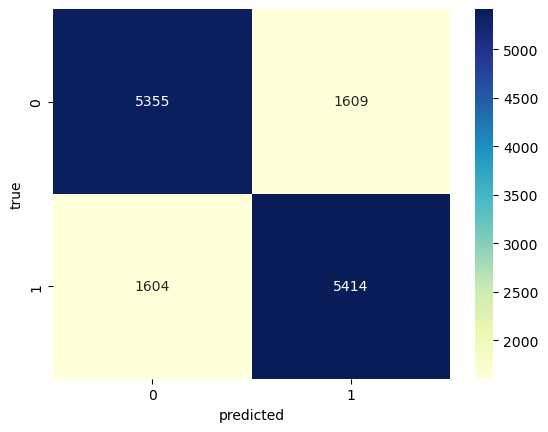

In [65]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()

## ROC curve

[0.86343384 0.16525765 0.06366817 0.77031537 0.30469948 0.83679269
 0.52733277 0.29448401 0.46280737 0.08426974 0.17400514 0.55056809
 0.02837232 0.64893851 0.29287412 0.44903236 0.93709872 0.73032278
 0.47605358 0.23990485 0.26773049 0.97679697 0.98950128 0.47305207
 0.69987922 0.79190971 0.44554974 0.81444545 0.66549957 0.94729902
 0.43627563 0.64928036 0.88119305 0.03922544 0.60430925 0.02755981
 0.28698202 0.31435378 0.96675126 0.63817283 0.71665665 0.80279909
 0.72999306 0.24936782 0.28217804 0.82071946 0.43268244 0.57105614
 0.43372323 0.36189193 0.33957213 0.79555764 0.16147695 0.84991569
 0.45023656 0.28280004 0.29383439 0.62699101 0.34691597 0.9809956
 0.9377831  0.79924176 0.39174856 0.68962082 0.16595484 0.8657434
 0.80125572 0.52799045 0.55656121 0.40155742 0.34547587 0.55951609
 0.19748782 0.77671159 0.52701936 0.18526063 0.38604187 0.98971429
 0.13484739 0.73176657 0.47927796 0.24404471 0.36229173 0.35773127
 0.42741444 0.86098306 0.88236345 0.93767755 0.65557805 0.500287

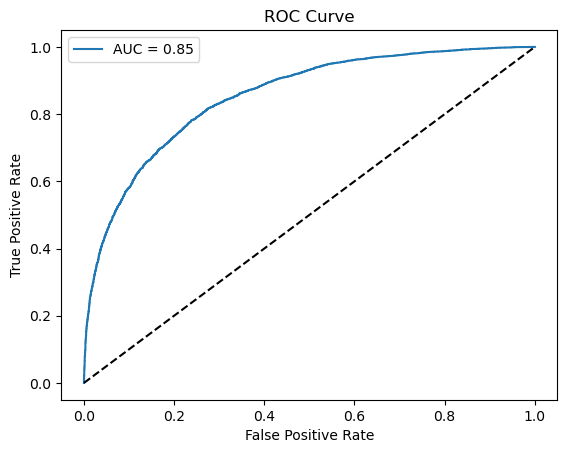

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Imporant features

In [67]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [68]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.049300
avg_positioning_percent_behind_ball,0.048516
avg_positioning_time_front_of_ball,0.040771
min_positioning_percent_infront_ball,0.027415
max_positioning_percent_behind_ball,0.027313
...,...
avg_speed,0.002620
movement_avg_speed_percentage_3,0.002603
movement_avg_powerslide_duration_2,0.002008
movement_avg_powerslide_duration_1,0.001939


In [69]:
correlations = pd.DataFrame(X_train.corrwith(y_train))
correlations.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.544345
max_positioning_percent_behind_ball,0.473981
min_positioning_percent_behind_ball,0.441041
positioning_percent_behind_ball_3,0.378467
positioning_percent_behind_ball_2,0.375914
...,...
positioning_percent_infront_ball_2,-0.375914
positioning_percent_infront_ball_3,-0.378467
max_positioning_percent_infront_ball,-0.441041
min_positioning_percent_infront_ball,-0.473981


## statistics

In [70]:
# average for winners and average for losers
X_train['avg_positioning_percent_behind_ball'].groupby(y_train).mean()


winner
False    69.874930
True     73.667895
Name: avg_positioning_percent_behind_ball, dtype: float64

In [71]:
# average for winners and average for losers
X_train['max_positioning_percent_behind_ball'].groupby(y_train).mean()

winner
False    73.686548
True     77.405309
Name: max_positioning_percent_behind_ball, dtype: float64

In [72]:
# average for winners and average for losers
X_train['avg_positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    30.125067
True     26.332105
Name: avg_positioning_percent_infront_ball, dtype: float64

In [73]:
# average for winners and average for losers
X_train['min_positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    26.313451
True     22.594690
Name: min_positioning_percent_infront_ball, dtype: float64

# Model 2 -------------------------------

## Model

In [74]:
rf2 = RandomForestClassifier(n_estimators=500,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth = 14,
                             random_state = 42
)

In [75]:
#13 min de volgende / 8 min voor team / 4 op blauwe laptop

In [76]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=500, random_state=42)

## Scores

In [77]:
y_pred2 = rf2.predict(X_test)

In [78]:
rf2.score(X_test, y_test)

0.7659848376484051

In [79]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.77      0.76      0.76      6964
        True       0.77      0.77      0.77      7018

    accuracy                           0.77     13982
   macro avg       0.77      0.77      0.77     13982
weighted avg       0.77      0.77      0.77     13982



In [80]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [81]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7659848376484051
recall 0.7673126246793959
precision 0.7666571753986332
f1 0.7669847600056973


In [82]:
from sklearn.metrics import accuracy_score

In [83]:
y_pred2 = rf2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.7659848376484051


### Conf matrix

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
print(confusion_matrix(y_test, y_pred2))

[[5325 1639]
 [1633 5385]]


[[5325 1639]
 [1633 5385]]
0.7659848376484051


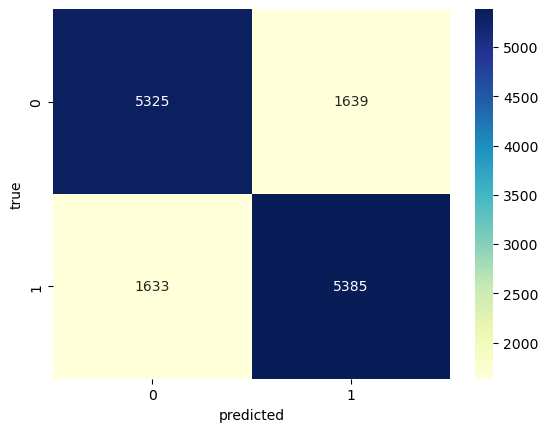

In [86]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### roc score

[0.8599659  0.08729617 0.08076577 0.73813441 0.23343279 0.87765884
 0.4530919  0.28326354 0.48047047 0.15033605 0.19290575 0.53382866
 0.02363949 0.6094735  0.29672326 0.42845915 0.9400529  0.75635444
 0.47150604 0.20439331 0.25741675 0.95701242 0.98303891 0.6148849
 0.74492755 0.86700684 0.44914528 0.79508116 0.6736152  0.94174156
 0.38398747 0.64889085 0.8962312  0.06555249 0.60033583 0.027907
 0.27372936 0.30242345 0.97773713 0.59682257 0.73705756 0.83274173
 0.74616957 0.29449198 0.31286543 0.78246644 0.41648256 0.55247549
 0.48194146 0.37906297 0.33057749 0.79040882 0.14268555 0.92033646
 0.44377612 0.23385927 0.31336672 0.59147558 0.37584391 0.97776378
 0.87519444 0.8846766  0.36344849 0.65012658 0.13513785 0.85769833
 0.77688463 0.44639744 0.61081968 0.39843087 0.34171048 0.56701873
 0.25105303 0.81218716 0.52683397 0.22049865 0.41113674 0.98899324
 0.11525081 0.70612181 0.4485599  0.19193468 0.29632602 0.37936796
 0.43704818 0.83965916 0.90185177 0.90177617 0.75253351 0.4999592

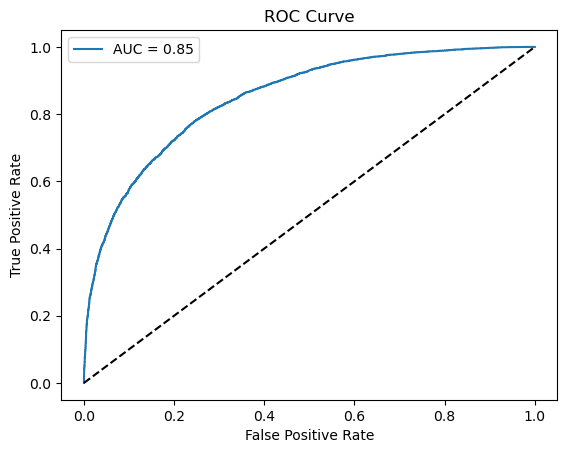

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Important features

In [88]:
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)

In [89]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.066661
avg_positioning_percent_infront_ball,0.061413
avg_positioning_time_front_of_ball,0.044325
max_positioning_percent_behind_ball,0.037056
min_positioning_percent_infront_ball,0.026878
...,...
movement_avg_speed_3,0.002351
movement_avg_speed_percentage_1,0.002333
movement_avg_powerslide_duration_3,0.001528
movement_avg_powerslide_duration_1,0.001473
